# LAB4- morphological operations

**objectives:**

* get familiar with morphological operators
* using the watershed transform


## Morphological operation
* for morphology functions [see skimage doc](http://scikit-image.org/docs/dev/api/skimage.morphology.html?highlight=morphology#module-skimage.morphology)

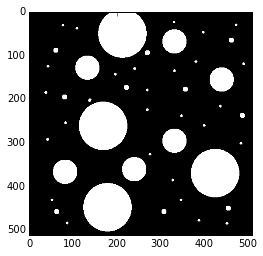

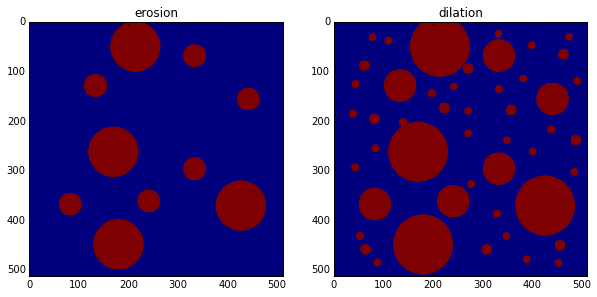

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread
import skimage.filter.rank as skr
from skimage.morphology import disk

ima = imread('http://homepages.ulb.ac.be/~odebeir/data/circles1.png')==0 #to be sure objects are = 1
plt.imshow(ima,cmap=plt.cm.gray);

# use the local maximum and local minimum for dilation and erosion

eroded_image = skr.minimum(ima,disk(5))
dilated_image = skr.maximum(ima,disk(5))

plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(eroded_image)
plt.title('erosion')
plt.subplot(1,2,2)
plt.imshow(dilated_image)
plt.title('dilation');


starting from the example above

1. Compute the **shape** histogram of *circles.png*
by computing the remaining object surface after an opening with a structuring element if increasing size, opening is a succession of one erosion folowed by one dilation using the sme structuring element.
1. Build a morphological filter that eliminate one size of circles.

## The watershed transform

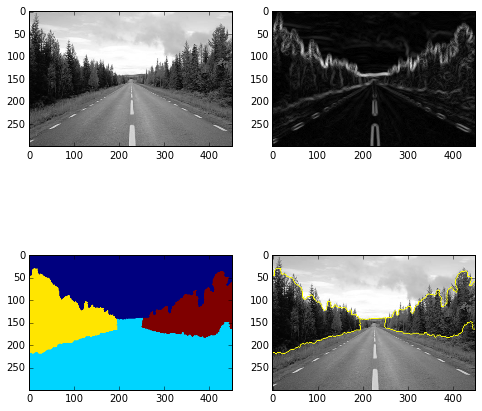

In [10]:
from skimage.morphology import watershed,disk
import skimage.filter.rank as skr
from skimage.segmentation import mark_boundaries

rgb = imread('http://homepages.ulb.ac.be/~odebeir/data/road.png')[:,:,:3]
ima = rgb[:,:,0]

smoothed = skr.mean(ima,disk(4))
gradient = skr.gradient(smoothed,disk(1))

marks = np.zeros_like(ima)

marks[50,200] = 1
marks[250,200] = 2
marks[150,100] = 3
marks[150,400] = 4

ws = watershed(gradient,marks)

plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
plt.imshow(ima,cmap=plt.cm.gray);
plt.subplot(2,2,2)
plt.imshow(gradient,cmap=plt.cm.gray);
plt.subplot(2,2,3)
plt.imshow(ws);
plt.subplot(2,2,4)
plt.imshow(mark_boundaries(rgb,ws));

starting from the example above
1. find good markers to segment [peppers.jpg](http://introcs.cs.princeton.edu/java/31datatype/peppers.jpg) image
1. isolate objects in [separ.png](http://homepages.ulb.ac.be/~odebeir/data/separ.png) (! check if the image is binary), for this last point, one can use the distance transform as illustrated below

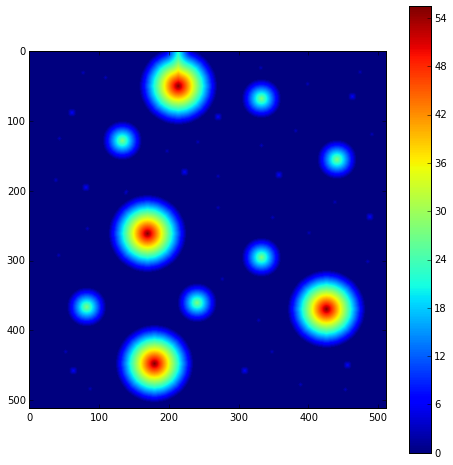

In [ ]:
from scipy import ndimage as ndi

ima = imread('http://homepages.ulb.ac.be/~odebeir/data/circles1.png')==0 #to be sure objects are = 1

# compute the euclidian distance to the background
distance = ndi.distance_transform_edt(ima)

plt.figure(figsize=[8,8])
plt.imshow(distance)
plt.colorbar();

In [ ]:
m,n = ima.shape

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=[10,10])
ax = fig.gca(projection='3d')
X,Y = np.meshgrid(range(n),range(m))
Z = distance
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('$distance$');